In [22]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
assets=['GOOG', 'AMZN', 'APPS','FDX', 'MSFT','DIS','SHW']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a]= wb.DataReader(a,data_source='yahoo', start ='2014-1-1')['Adj Close']

In [24]:
pf_data.tail()

,GOOG,AMZN,APPS,FDX,MSFT,DIS,SHW
Date,,,,,,,
2019-12-26,1360.400024,1868.770020,8.08,152.490005,158.669998,145.699997,581.599976
2019-12-27,1351.890015,1869.800049,7.40,152.529999,158.960007,145.750000,581.690002
2019-12-30,1336.140015,1846.890015,7.01,150.139999,157.589996,143.770004,578.739990
2019-12-31,1337.020020,1847.839966,7.13,151.210007,157.699997,144.630005,583.539978
2020-01-02,1367.369995,1898.010010,7.31,155.100006,160.619995,148.199997,571.849976


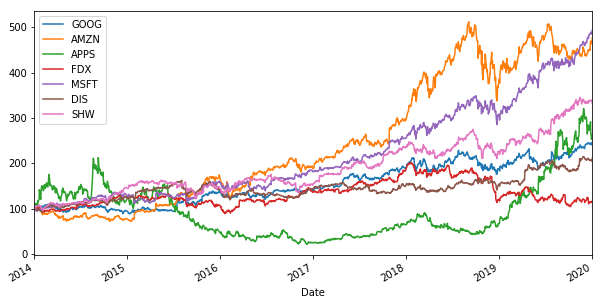

In [25]:
#normalizzo e plotto
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,5))

In [26]:
#calcolo ritorno logaritmico 
log_returns =np.log(pf_data/pf_data.shift(1))

In [57]:
#percentuale di ritorno
log_returns.mean()*250*100 


GOOG    14.943885
AMZN    25.863984
APPS    16.066158
FDX      2.628402
MSFT    26.468160
DIS     12.372869
SHW     19.911740
dtype: float64

In [28]:
log_returns.cov()*250

,GOOG,AMZN,APPS,FDX,MSFT,DIS,SHW
GOOG,0.054472,0.042709,0.026064,0.021903,0.033638,0.016761,0.017244
AMZN,0.042709,0.087450,0.027189,0.023904,0.036645,0.018897,0.018403
APPS,0.026064,0.027189,0.421248,0.021758,0.026030,0.013540,0.020314
FDX,0.021903,0.023904,0.021758,0.058949,0.023065,0.017648,0.019739
MSFT,0.033638,0.036645,0.026030,0.023065,0.050666,0.017243,0.017817
DIS,0.016761,0.018897,0.013540,0.017648,0.017243,0.037887,0.014606
SHW,0.017244,0.018403,0.020314,0.019739,0.017817,0.014606,0.044440


In [29]:
log_returns.corr()

,GOOG,AMZN,APPS,FDX,MSFT,DIS,SHW
GOOG,1.000000,0.618805,0.172062,0.386526,0.640297,0.368960,0.350488
AMZN,0.618805,1.000000,0.141660,0.332934,0.550526,0.328305,0.295201
APPS,0.172062,0.141660,1.000000,0.138073,0.178176,0.107179,0.148467
FDX,0.386526,0.332934,0.138073,1.000000,0.422045,0.373442,0.385645
MSFT,0.640297,0.550526,0.178176,0.422045,1.000000,0.393562,0.375486
DIS,0.368960,0.328305,0.107179,0.373442,0.393562,1.000000,0.355965
SHW,0.350488,0.295201,0.148467,0.385645,0.375486,0.355965,1.000000


In [30]:
num_assets=len(assets)

In [31]:
num_assets


7

In [32]:
#Do i pesi al portafoglio di investimento
weights=np.array([0.166,0.179,0.103,0.156,0.110,0.186,0.100])

In [33]:
weights


array([0.166, 0.179, 0.103, 0.156, 0.11 , 0.186, 0.1  ])

In [43]:
#verifico che la somma dei pesi sia = 1
weights[0] + weights[1] + weights[2] + weights[3] + weights[4] + weights[5]+ weights[6] 

1.0000000000000002

In [44]:
#ritorno atteso del portafoglio
np.sum(weights * log_returns.mean())*250

0.15624222345035021

In [45]:
np.dot(weights.T, np.dot(log_returns.cov()*250,weights))

0.04454420383066273

In [46]:
#volatilità attesa del portafoglio
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250,weights)))

0.21105497821814753

In [51]:
#genero tot combinazioni di peso per il portafoglio (nel ciclo for inserisci il n combinazioni)
pfoglio_returns=[]
pfoglio_volatilities=[]
for x in range (100000):
    weights=np.random.random(num_assets)
    weights/=np.sum(weights)
    pfoglio_returns.append(np.sum(weights* log_returns.mean())*250)
    pfoglio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250,weights))))

In [52]:
#plottiamo i dati
portfoglios=pd.DataFrame({'Return': pfoglio_returns, 'Volatility': pfoglio_volatilities})


In [53]:
portfoglios.head()

,Return,Volatility
0,0.141584,0.206855
1,0.178027,0.196605
2,0.196204,0.213084
3,0.160337,0.268649
4,0.170390,0.234191


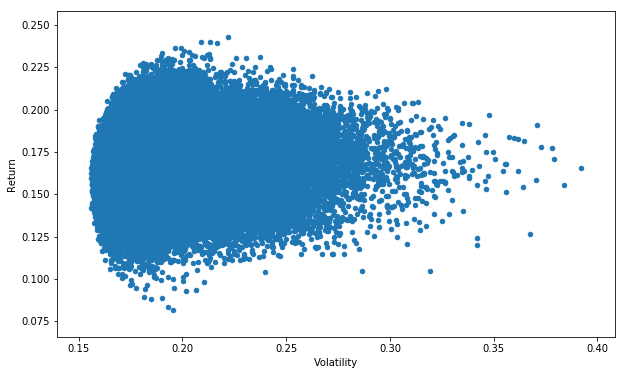

In [54]:
portfoglios.plot(x='Volatility', y='Return', kind='scatter',figsize=(10,6))

In [3]:
min=

NameError: name 'pfoglio_volatilities' is not defined